In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
# creating dataset

X,y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=15)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# model training

from sklearn.linear_model import LogisticRegression
logistics = LogisticRegression()

In [6]:
logistics.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
y_pred = logistics.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [9]:
score=accuracy_score(y_test,y_pred)
print("Accuracy of the model is: ", score)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model is:  0.9166666666666666
Confusion Matrix:
 [[146  11]
 [ 14 129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Hyperparamter Tuning and Cross Validation

### Grid SearchCV

In [10]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [0.01,0.1,1,10,100]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


In [11]:
params = dict(penalty=penalty, C=c_values, solver=solver)

In [12]:
## grid search cv

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model,param_grid=params,scoring='accuracy',cv = cv, n_jobs=-1)

In [13]:
grid.fit(X_train, y_train)

c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\mukul\AppD

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [14]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [15]:
grid.best_score_

np.float64(0.9242857142857142)

In [16]:
y_pred = grid.predict(X_test)

In [17]:
score=accuracy_score(y_test,y_pred)
print("Accuracy of the model is: ", score)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model is:  0.92
Confusion Matrix:
 [[149   8]
 [ 16 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Randomized SearchCV

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1)

In [20]:
randomcv.fit(X_train, y_train)
print("Best parameters from Randomized Search CV:", randomcv.best_params_)

c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\mukul\AppData

Best parameters from Randomized Search CV: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}


c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.91285714        nan 0.92142857        nan
        nan 0.91142857 0.91285714        nan]
  warnings.warn(


In [21]:
randomcv.best_score_

np.float64(0.9214285714285714)

In [22]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 0.1}

In [23]:
y_pred = randomcv.predict(X_test)

In [24]:
score=accuracy_score(y_test,y_pred)
print("Accuracy of the model is: ", score)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model is:  0.9166666666666666
Confusion Matrix:
 [[147  10]
 [ 15 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       157
           1       0.93      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Logistic Regression for MultiClass Classification 

In [25]:
X,y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative = 3, random_state=15)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train, y_train)

c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [28]:
y_pred = logistic.predict(X_test)

In [29]:
score=accuracy_score(y_test,y_pred)
print("Accuracy of the model is: ", score)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model is:  0.79
Confusion Matrix:
 [[84 10  8]
 [ 3 74 25]
 [10  7 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



## Logistic Regression for Imbalanced Dataset

In [30]:
# generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [31]:
## imbalanced dataset
X,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [32]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [33]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

<Axes: xlabel='0', ylabel='1'>

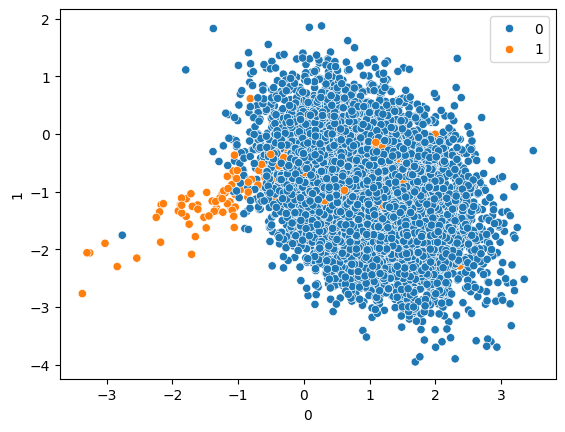

In [34]:
import seaborn as sns
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [35]:
## split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty= ['l1', 'l2', 'elasticnet']
c_values = [0.01,0.1,1,10,100]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100] ]


In [37]:
params= dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight) 

In [38]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [0.01, 0.1, 1, 10, 100],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model,param_grid=params,scoring='accuracy',cv = cv)


In [40]:
grid.fit(X_train, y_train)

c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [41]:
grid.best_params_

{'C': 0.1,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [42]:
y_pred = grid.predict(X_test)

In [43]:
score=accuracy_score(y_pred,y_test)
print("Accuracy of the model is: ", score)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model is:  0.9896
Confusion Matrix:
 [[2465    0]
 [  26    9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500



## Logitics Regression With ROC Curve and ROC AUC score

In [44]:
# roc curve and auc

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [45]:
# generate 2 class dataset
x,y = make_classification(n_samples=1000, n_classes=2, random_state=1)  

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [47]:
# created a dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [48]:
# model training
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
# prediction based on probabilities
model_prob = model.predict_proba(X_test)

In [50]:
# lets focus on positive class probabilities
model_prob = model_prob[:,1]

In [51]:
# ## let calculate scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print("Dummy Model AUC:", dummy_model_auc)
print("Model AUC:", model_auc)

Dummy Model AUC: 0.5
Model AUC: 0.907648


### If we plot TPR(true positive rate) on y axis and FNR (false negative rate) on x axis then, we will get our ROC curve

In [52]:
## Calculate ROC curve
dummy_fpr, dummy_tpr, _ = roc_curve(y_test,dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

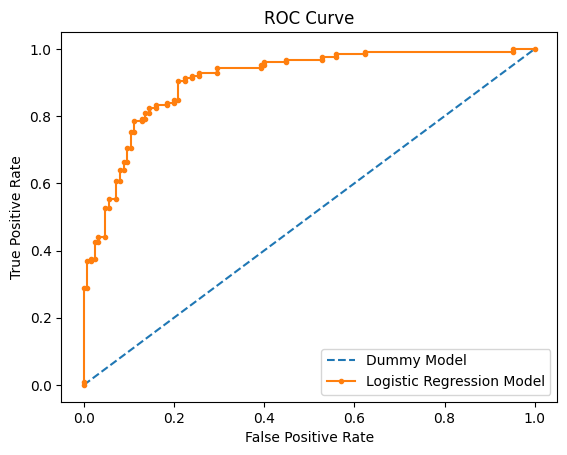

In [53]:
# plot the roc curve for the model

plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend()
# show the plot
plt.title('ROC Curve')
plt.show()
         

In [54]:
thresholds

array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

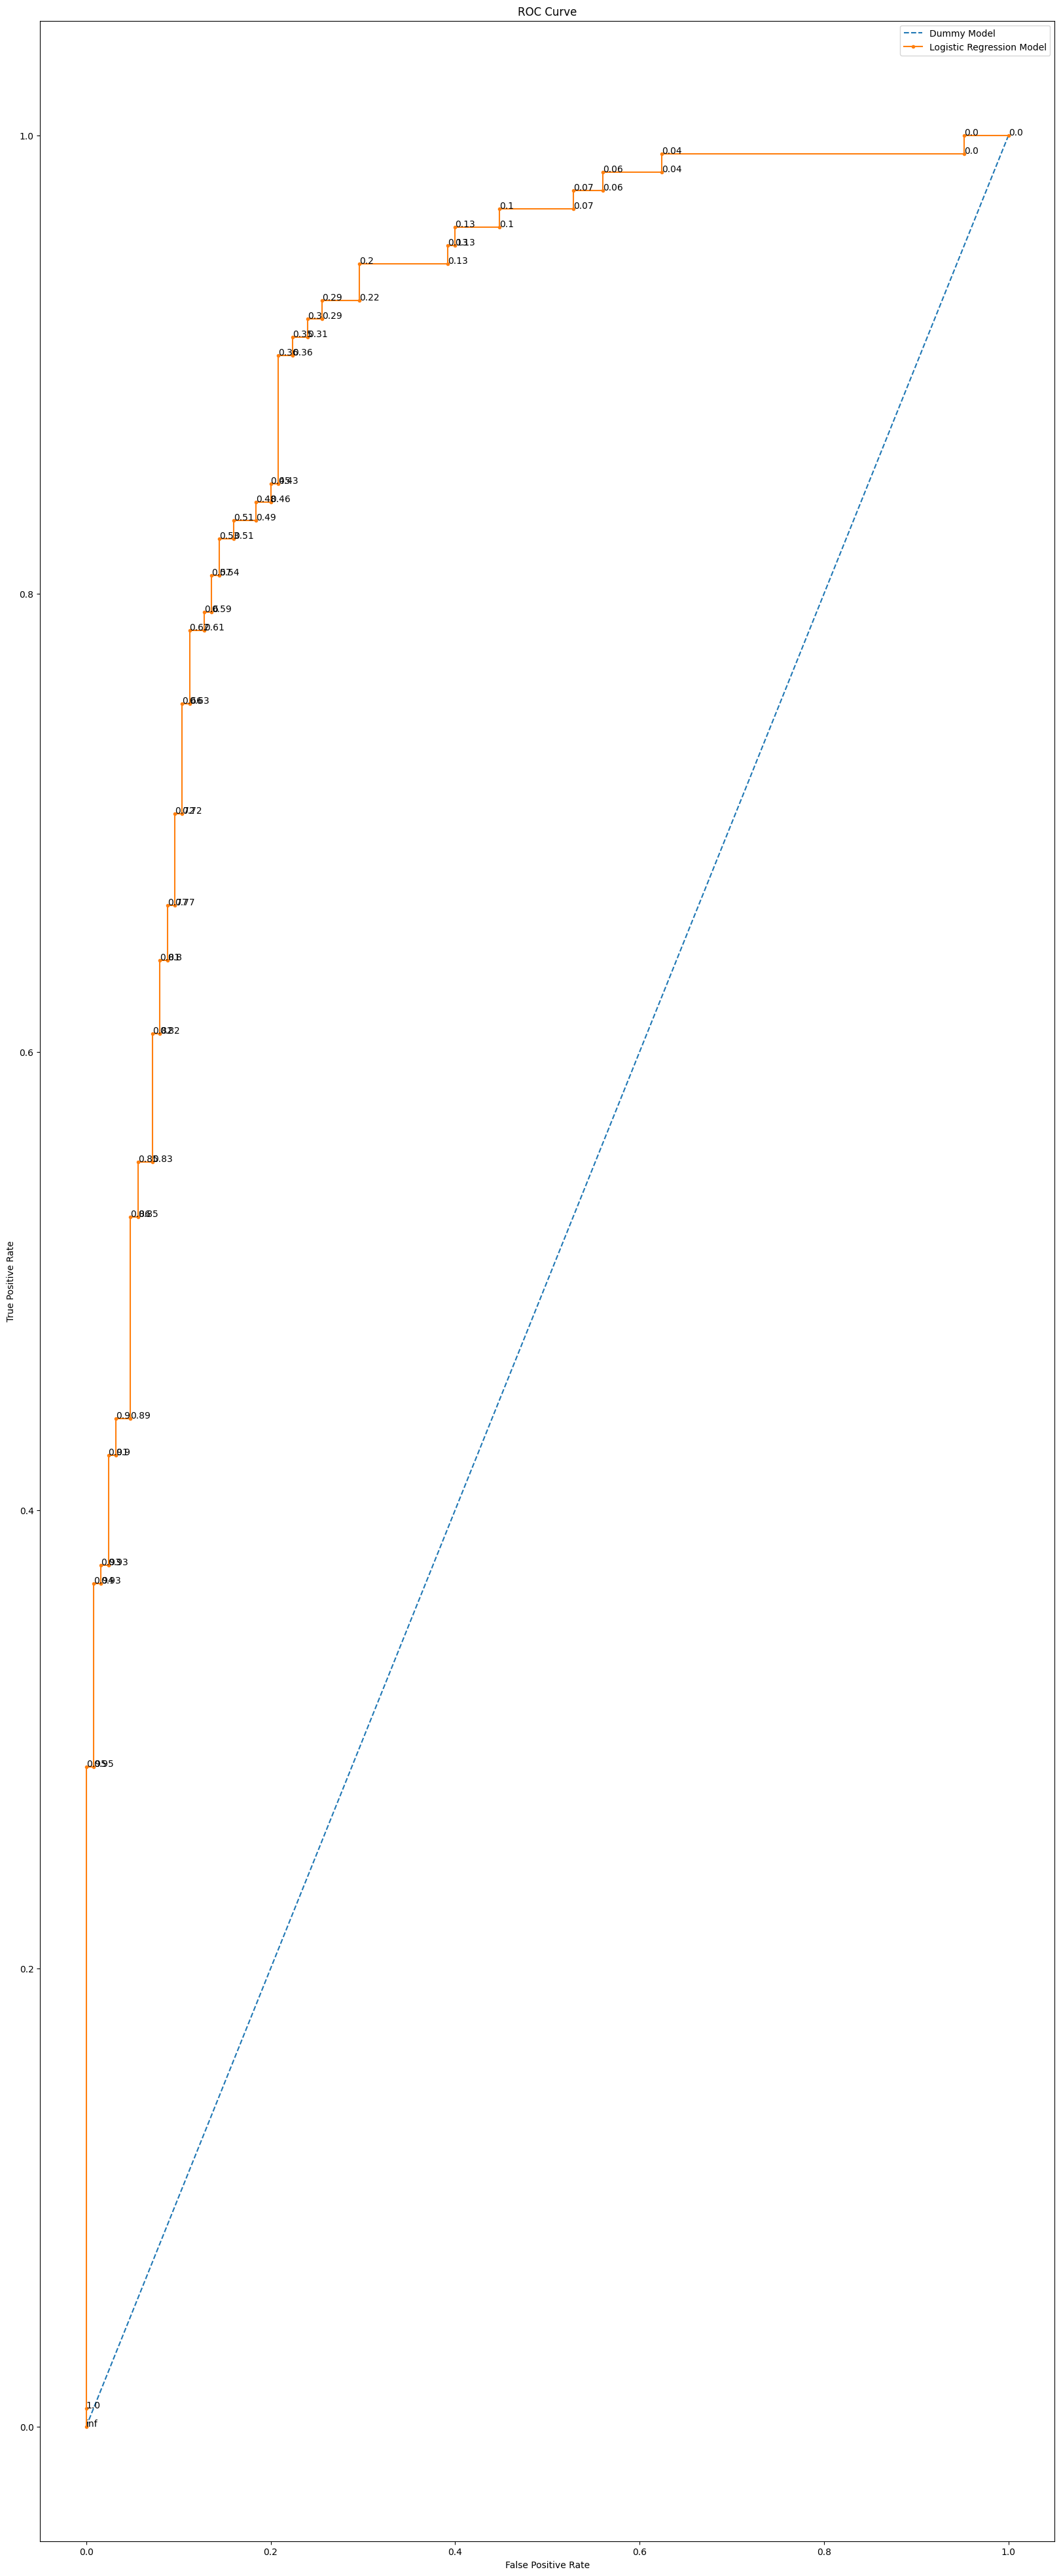

In [ ]:
# plot the roc curve for the model with thresholds
fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression Model')
for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy = (xyz[0],xyz[1]))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend()
# show the plot
plt.title('ROC Curve')
plt.show()
         